# Medical Cost / Health Insurance  Prediction
 * Author: Peng Shen (Dylan) 
 * Student ID: 57408005
 * Last editing date: 25.05.2019

## Background
* Prediction of the potential medical cost of an individual could be useful in real-world scenarios such as helping insurance company to determine the personalized premium based on client's personal information, as well as assisting health insurance bureau to make a budget.

## Objective
* Perform the data analysis to explore the factors affecting the medical costs and eventually develop some predicting models for the medical costs;
* To develop a GUI that prompts for the personal profile and returns the predicted medical cost.

To achieve this objective, I need to figure out those questions below:
1. Is there a relationship between the response and predictors?
2. Deciding on important predictors to add into model.
3. Goodness of fit of the model.
4. Prediction accuracy of models.

## Contents
1. Importing Libraries
2. Loading The Dataset
3. Data Cleaning
4. Overview of The Variables in The Dataset
5. Exploaratory Data Analysis
6. Fitting Candidate Models and Making comparisons
7. Developing a GUI for Medical Cost Prediction

## 1. Importing Libraries

In [1]:
# Basic Python Packages
import pandas as pd # for dataframes
import numpy as np # for mathmatical operations

# Matplotlib and Seaborn
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
%matplotlib inline

# Plotly Packages for data visulization
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# scikit-learn for Preprocessing of dataset and Machine Learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Regression Modeling
import statsmodels.api as sm

# Other Libraries
import warnings
warnings.filterwarnings("ignore")

## 2. Load the dataset

* Age: age of primary beneficiary, years
* Sex: insurance contractor gender, [female, male]
* BMI: Body mass index, providing an understanding of body weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9,      one is underweight if < 18.5, overweight if ≥ 25 and <29.9, obese if ≥ 30
* Children: Number of children covered by health insurance / Number of dependents
* Smoker: Smoking status
* Region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* Charges: Individual medical costs billed by health insurance, USD

In [2]:
df = pd.read_csv('insurance.csv')
original_df = df.copy()

In [3]:
# Get the genenal infomation of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [4]:
# Display the first 5 rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3. Data Preparation

In [5]:
# Checking missing data
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Checking duplicated data
df.duplicated().sum()

1

In [7]:
df.duplicated().shape

(1338,)

In [8]:
df[df.duplicated(keep = 'first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df[df.duplicated(keep = 'last')]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631


In [10]:
# Remove the duplicated data
df.drop_duplicates(keep = 'first').shape

(1337, 7)

In [11]:
df_1 = df.drop_duplicates(keep = 'first')

In [12]:
df_1.shape

(1337, 7)

## 4. Overview of the variables in the dataset

In [13]:
# 4 out of 7 varaibles are quatitative variable
df_1.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


### 4.1 Medical Charges

In [14]:
# Medical charges is the response variable of interest, which is a continuous numerical variable, so making 
# prediction of this is a regression problem

In [15]:
# Distribution of Charges
charges_dist = df_1["charges"].values
charges_hist = go.Histogram(x=charges_dist, histnorm='probability', name="Charges Distribution")
data = [charges_hist]
layout = go.Layout(title="Charges Distribution")
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Charges Distribution")

# From the histogram we can observe a positive skewed distribution of charges

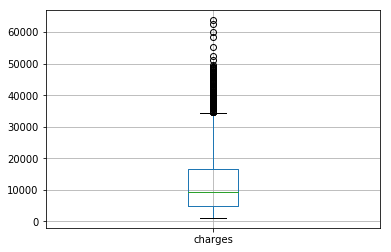

In [16]:
df_1.boxplot(column = 'charges')

In [17]:
# Log Transformation of Charges and Distribution of Log Charges
logcharges_dist = np.log(df_1["charges"])
logcharges_hist = go.Histogram(x=logcharges_dist, histnorm='probability', name="Log Charges Distribution")
data = [logcharges_hist]
layout = go.Layout(title="Log Charges Distribution")
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename="Log Charges Distribution")

In [18]:
# Plotting charges and log charges on one graph
fig = tools.make_subplots(rows=2, cols=1, 
                          subplot_titles=("Charges Distribution", "Log Charges Distribution"),
                         print_grid=False)
fig.append_trace(charges_hist, 1, 1)
fig.append_trace(logcharges_hist, 2, 1)
fig['layout'].update(showlegend=True, title="Distribution of Charges and Log Charges")
iplot(fig, filename="Distribution of Charges and Log Charges")

### 4.2 Age

In [19]:
# Distribution of Age (continuous variable)
age_dist = df_1["age"].values
age_hist = go.Histogram(x = age_dist, 
                        histnorm = "probability", 
                        xbins=dict(start=15,end=65,size=5),
                        name = "Distribution of Age"
                       )
data = [age_hist]
layout = go.Layout(title="Age Distribution")
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Distribution of Age")

Text(0.5, 0, '')

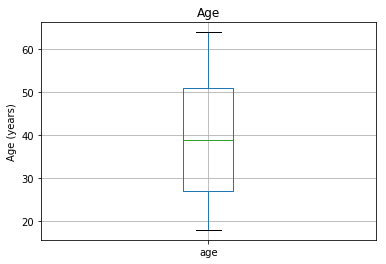

In [20]:
# Boxplot can help to indentify outliers
age_boxplot = df_1.boxplot(column = 'age')
plt.title("Age")
plt.ylabel("Age (years)")
plt.xlabel("")

### 4.3 Body Mass Index (BMI)

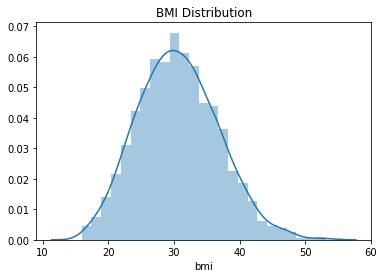

In [21]:
# Distribution of continuous feature BMI
distPlot = sns.distplot(df_1['bmi'])
plt.title("BMI Distribution")
plt.show(distPlot)

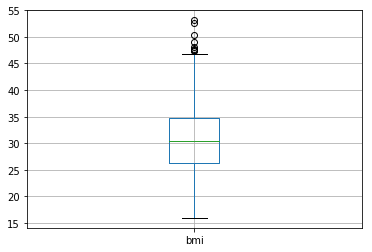

In [22]:
# Boxplot can help to indentify outliers
df_1.boxplot(column = 'bmi')

### 4.4 Number of Children

In [23]:
# Number of Children covered by insurance is an discrete variable
df_1.children.unique()

array([0, 1, 3, 2, 5, 4])

In [24]:
df_1.children.value_counts()

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [25]:
# Bar Chart Displaying the Distribution of the number of children covered by insurance
children_dist = df_1["children"].values
children_hist = go.Histogram(x=children_dist, histnorm='probability', name="Number of Chlildren Distribution")
data = [children_hist]
layout = go.Layout(title="Number of Children Distribution", bargap=0.5)
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename="Number of Children Distribution")

### 4.5 Sex

In [26]:
# Gender is a binary variable
df_1.sex.unique()

array(['female', 'male'], dtype=object)

In [27]:
df_1.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

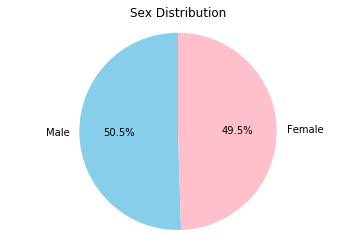

In [28]:
# Pie chart
labels = ['Male', 'Female']
sizes = [675, 662]
colors = ['skyblue', 'pink']
 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title("Sex Distribution")
plt.axis('equal')
plt.show()

### 4.6 Smoking Status

In [29]:
# Smoking status is a categorical and a binary variable
df_1.smoker.unique()

array(['yes', 'no'], dtype=object)

In [30]:
df_1.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

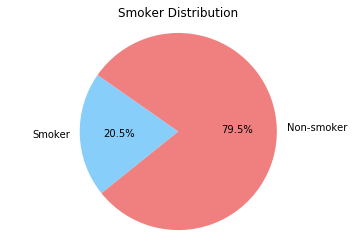

In [31]:
# Pie chart 
labels = ['Smoker', 'Non-smoker']
sizes = [274, 1063]
colors = ['lightskyblue', 'lightcoral']
 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=145)
plt.title("Smoker Distribution")
plt.axis('equal')
plt.show()

### 4.7 Living Region

In [32]:
# Living Region is a categorical variable
df_1.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [33]:
df_1.region.value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

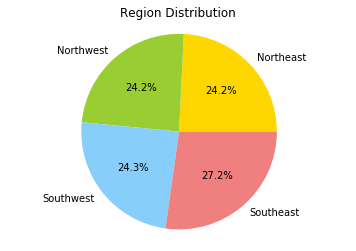

In [34]:
# Pie chart
labels = ['Northeast', 'Northwest', 'Southwest', 'Southeast']
sizes = [324, 324, 325, 364]
colors = ['gold', 'Yellowgreen', 'lightskyblue', 'lightcoral']
 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=0)
plt.title("Region Distribution")
 
plt.axis('equal')
plt.show()

## 5. Exploratory Analysis

* To figure out which features/columns are important for prediction of medical charges

### 5.1 Relationship of Charges to Numerical features

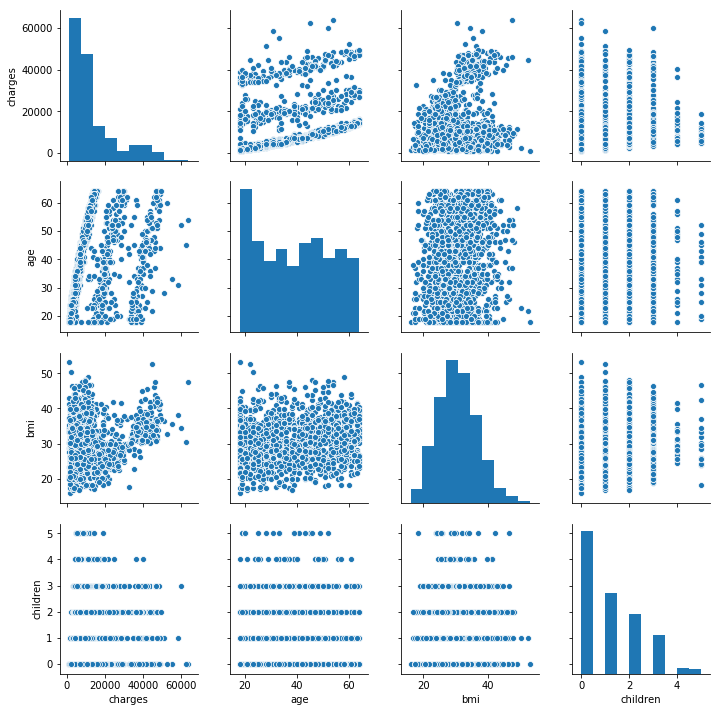

In [35]:
pairPlot = sns.pairplot(df_1[["charges", "age", "bmi", "children"]])

#### 5.1.1 Relationship between Charges and Age

Text(0.5, 0, 'Age (years)')

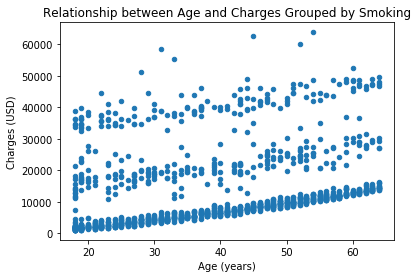

In [36]:
df_1.plot.scatter(x='age', y='charges')
plt.title("Relationship between Age and Charges Grouped by Smoking")
plt.ylabel("Charges (USD)")
plt.xlabel("Age (years)")

* We can observe an upper trend of charges as age increases, and there seems to be three distinctive groups/clusters. Each of the clusters exhibit a linear form, so a simple least-square regression between Age and Charges may not be good. A more complicated model would be needed. It's worth trying to displaying this plot by one important feature Smoker, to see if this pattern has anything to do with this factor.

Text(0.5, 0, 'Age (years)')

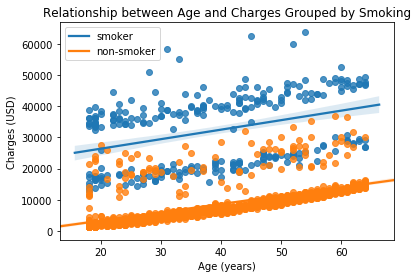

In [37]:
# Create Age vs. Charges scatter plots grouped by smoker and non-smoker
fig = sns.regplot(x='age', y='charges', data=df_1.loc[df_1['smoker'] == 'yes'])
fig = sns.regplot(x='age', y='charges', data=df_1.loc[df_1['smoker'] == 'no'])
fig.set_title("Relationship between Age and Charges Grouped by Smoking")
fig.legend(('smoker', 'non-smoker'))
fig.set_ylabel("Charges (USD)")
fig.set_xlabel("Age (years)")

Text(0.5, 20.80000000000002, 'Age (years)')

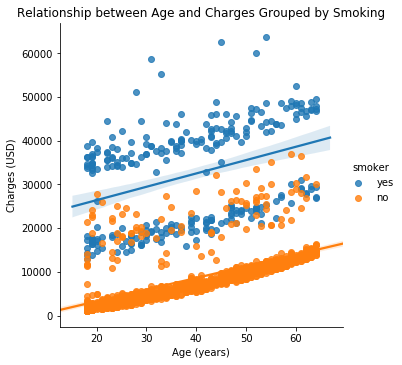

In [38]:
# Create Age vs. Charges scatter plots grouped by smoker and non-smoker
fig = sns.lmplot(x='age', y='charges', data=df_1, hue='smoker')
plt.title("Relationship between Age and Charges Grouped by Smoking")
plt.ylabel("Charges (USD)")
plt.xlabel("Age (years)")

In [39]:
# Transform BMI to an ordinal variable and create a new column called 'weight_status' in the dataframe
df_1['weight_status'] = 'default'
df_1.loc[df_1['bmi'] < 18.5,['weight_status']] = 'underweight'
df_1.loc[(df_1['bmi'] >= 18.5)&(df_1['bmi'] < 25),['weight_status']] = 'normal'
df_1.loc[(df_1['bmi'] >= 25)&(df_1['bmi'] < 30),['weight_status']] = 'overweight'
df_1.loc[df_1['bmi'] >= 30,['weight_status']] = 'obese'
df_1.head()

,age,sex,bmi,children,smoker,region,charges,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


Text(0.5, 0, 'Age (years)')

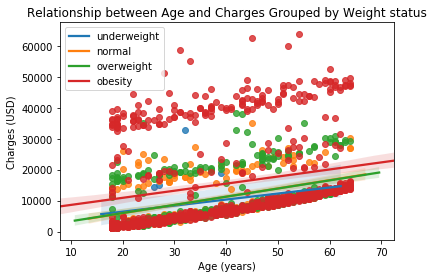

In [40]:
# Create Age vs. Charges scatter plots grouped by weight status
fig = sns.regplot(x='age', y='charges', data=df_1.loc[df_1['weight_status'] == 'underweight'])
fig = sns.regplot(x='age', y='charges', data=df_1.loc[df_1['weight_status'] == 'normal'])
fig = sns.regplot(x='age', y='charges', data=df_1.loc[df_1['weight_status'] == 'overweight'])
fig = sns.regplot(x='age', y='charges', data=df_1.loc[df_1['weight_status'] == 'obese'])
fig.set_title("Relationship between Age and Charges Grouped by Weight status")
fig.legend(('underweight', 'normal', 'overweight', 'obesity'))
fig.set_ylabel("Charges (USD)")
fig.set_xlabel("Age (years)")

In [41]:
# Creat a new column 'weight_smoking_status'
df_1['smoking_weight_status'] = 'default'
df_1.loc[(df_1['weight_status'] != 'obese')&(df_1['smoker']=='yes'),['smoking_weight_status']] = 'smoker_non-obese'
df_1.loc[(df_1['weight_status'] == 'obese')&(df_1['smoker']=='yes'),['smoking_weight_status']] = 'smoker_obese'
df_1.loc[(df_1['weight_status'] != 'obese')&(df_1['smoker']=='no'),['smoking_weight_status']] = 'non-smoker_non-obese'
df_1.loc[(df_1['weight_status'] == 'obese')&(df_1['smoker']=='no'),['smoking_weight_status']] = 'non-smoker_obese'
df_1.head()

,age,sex,bmi,children,smoker,region,charges,weight_status,smoking_weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,overweight,smoker_non-obese
1,18,male,33.770,1,no,southeast,1725.55230,obese,non-smoker_obese
2,28,male,33.000,3,no,southeast,4449.46200,obese,non-smoker_obese
3,33,male,22.705,0,no,northwest,21984.47061,normal,non-smoker_non-obese
4,32,male,28.880,0,no,northwest,3866.85520,overweight,non-smoker_non-obese


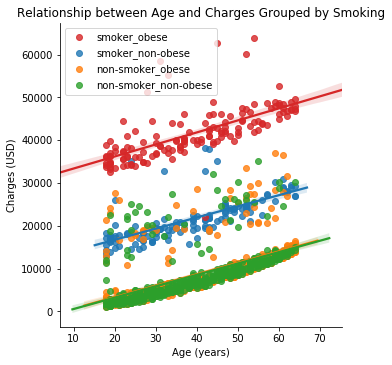

In [42]:
# Create Age vs. Charges scatter plots grouped by smoking and obesity
fig = sns.lmplot(x='age', y='charges', data=df_1, hue='smoking_weight_status', legend=False)
plt.title("Relationship between Age and Charges Grouped by Smoking")
plt.ylabel("Charges (USD)")
plt.xlabel("Age (years)")
# Change the order of legend
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,0,1,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
# Save the plot to as a file
plt.savefig('smoking_weight_age_charges', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=None,
        frameon=None, metadata=None)

#### 5.1.2 Relationship between Charges and BMI

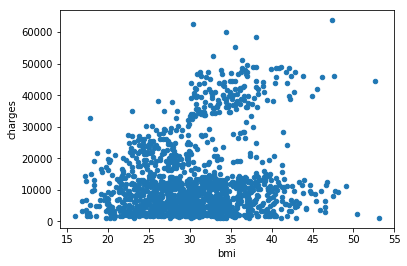

In [43]:
df_1.plot.scatter(x='bmi', y='charges')

* We can observe more people charged higher when bmi > 30, and there seems to be two groups/clusters indicating other underlying factors.

Text(0, 0.5, 'Charges (USD)')

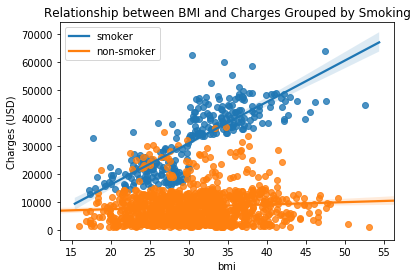

In [44]:
# Create BMI vs. Charges scatter plots grouped by smoker and non-smoker
fig = sns.regplot('bmi', 'charges', df_1.loc[df_1['smoker'] == 'yes'])
fig = sns.regplot('bmi', 'charges', df_1.loc[df_1['smoker'] == 'no'])
fig.set_title("Relationship between BMI and Charges Grouped by Smoking")
fig.legend(('smoker', 'non-smoker'))
fig.set_ylabel("BMI (kg/m²)")
fig.set_ylabel("Charges (USD)")

* BMI seems to have no effect on charges for non-smokers, while there is an upper trend of charges as bmi increases for smokers.

#### 5.1.5 Relationship between Charges and Children

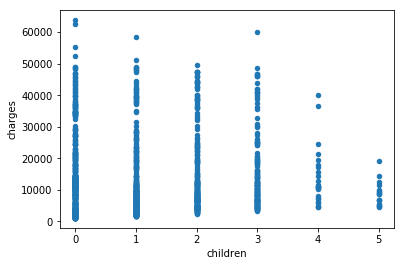

In [45]:
df_1.plot.scatter(x='children', y='charges')

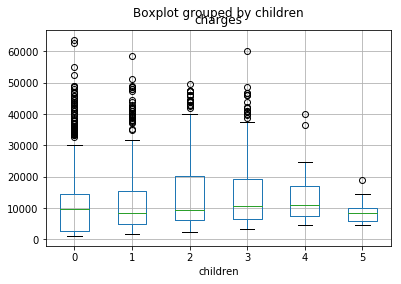

In [46]:
df_1.boxplot(column = 'charges', by = 'children')

* People with 4 or 5 children seem to pay less charge.

### 5.2 Relationship of Charges to the Categorical Features

* In all instances charges demonstrate a right skewed distribution

In [47]:
# define a funtion to make boxplot
def making_boxplot(data, group, feature):
    """function to produce boxplot using seaborn"""
    sns.boxplot(x = group, y = feature, data = data)

#### 5.2.1 Relationship between Charges and Sex

In [48]:
# Average charges for different gender
meanChargeGender = df_1.groupby(by = 'sex')['charges'].mean()
print(meanChargeGender)

sex
female    12569.578844
male      13974.998864
Name: charges, dtype: float64


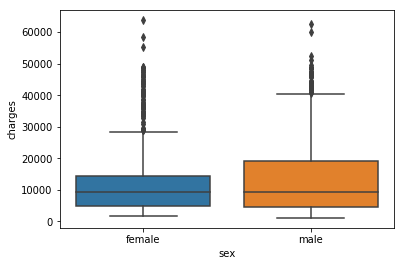

In [49]:
# Boxplot
making_boxplot(df_1, 'sex', 'charges')

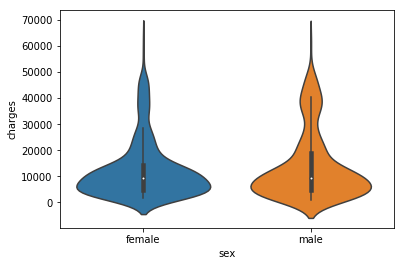

In [50]:
# Violin plot
violinPlot = sns.violinplot(x = 'sex', y = 'charges', data = df_1)

* There isn't much difference between male and female regarding their medical cost. 

#### 5.2.2 Relationship between Charges and Smoker

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64


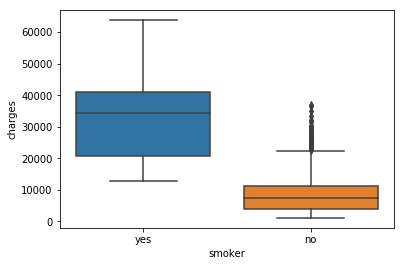

In [51]:
# Average charges for smoker and non-smoker
meanChargeSmoker = df_1.groupby(by = 'smoker')['charges'].mean()
print(meanChargeSmoker)
# Box plot
boxPlot = sns.boxplot(x = 'smoker', y = 'charges', data = df_1)

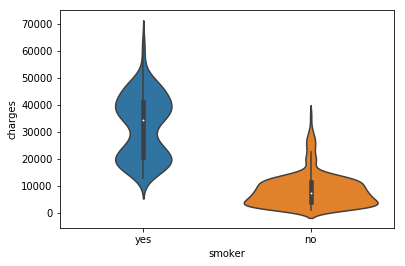

In [52]:
# ViolinPlot
violinPlot = sns.violinplot(x = 'smoker', y = 'charges', data = df_1)

* We can observe a obvious higher charges paid by smokers compared to non-smokers.

smoking_weight_status
non-smoker_non-obese     7977.029520
non-smoker_obese         8855.531349
smoker_non-obese        21363.217016
smoker_obese            41557.989840
Name: charges, dtype: float64


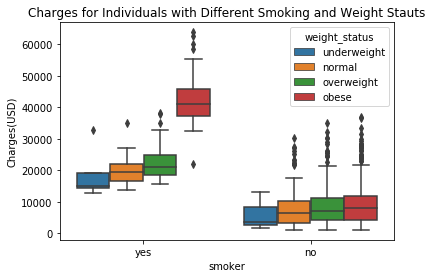

In [53]:
# Average charges for smoker and non-smoker
meanChargeSmoker = df_1.groupby(by = 'smoking_weight_status')['charges'].mean()
print(meanChargeSmoker)
# Box plot
boxPlot = sns.boxplot(x='smoker', y='charges', hue='weight_status', data=df_1, hue_order=('underweight','normal',
                                                                                     'overweight', 'obese'))
plt.title("Charges for Individuals with Different Smoking and Weight Stauts")
plt.ylabel("Charges(USD)")
# Save the plot as a file
plt.savefig('smoking_weight_charges', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight', pad_inches=None,
        frameon=None, metadata=None)

#### 5.2.3 Relationship between Charges and Region

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


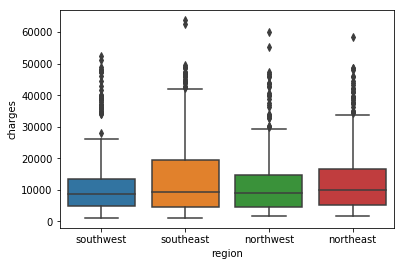

In [54]:
meanChargeRegion = df_1.groupby(by = 'region')['charges'].mean()
print(meanChargeRegion)
boxPlot = sns.boxplot(x = 'region', y = 'charges', data = df_1)

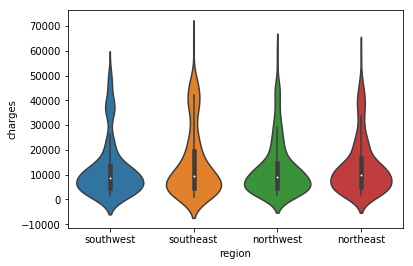

In [55]:
violinPlot = sns.violinplot(x = 'region', y = 'charges', data = df_1)

* There isn't much difference of medical charges among different regions.

### 5.3 Quantifying the correlation pattern observed in data visualization

Based on the visualization of the relationship between charges and other predictors above, we can make some hypothesis:
* There is no significant difference of charges between different sex or regions
* Smokers are charged significantly higher than those who don't smoke
* The charge increases as the benificiary gets older
* There is a distinctive group of people with BMI larger than 30 charged significantly high, which might indicate some confounding factors 
* The charges are relatively low for those with 4 or 5 children

####  Simple linear regression will be used to quantify the correlation of the numerical predictors to Charges

##### 5.3.1 Simple linear regression using Age as a predictor

In [56]:
# Simple linear regression using age as a predictor
Y = df_1['charges']
X = df_1['age']
X = sm.add_constant(X)
SimpleLinear = sm.OLS(Y, X).fit()
print(SimpleLinear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     130.4
Date:                Sun, 26 May 2019   Prob (F-statistic):           6.98e-29
Time:                        02:29:55   Log-Likelihood:                -14405.
No. Observations:                1337   AIC:                         2.881e+04
Df Residuals:                    1335   BIC:                         2.882e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3190.0217    938.396      3.399      0.0

* The P value of regression coefficient is <0.001 which is significant.
* The R-square is 0.089, meaning that fitted model explains 8.9% of the variation of charges. 
* The P value of the F-statistic is <0.001 indicating that the model is significantly improved than just taking the mean charges.

##### 5.3.2 Simple linear regression using BMI as a predictor

In [57]:
# Simple linear regression using BMI as a predictor
Y = df_1['charges']
X = df_1['bmi']
X = sm.add_constant(X)
SimpleLinear = sm.OLS(Y, X).fit()
print(SimpleLinear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.70
Date:                Sun, 26 May 2019   Prob (F-statistic):           2.47e-13
Time:                        02:29:55   Log-Likelihood:                -14440.
No. Observations:                1337   AIC:                         2.888e+04
Df Residuals:                    1335   BIC:                         2.889e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1202.1404   1664.857      0.722      0.4

* The P value of regression coefficient is < 0.001, which is significant.
* The R-square is 0.039, meaning that fitted model explains 3.9% of the variation of charges. 
* The P value of the F-statistic is <0.001 indicating that the model is significantly improved than just taking the mean charges.

###### 5.3.3 Simple linear regression using Children as a predictor

In [58]:
# Simple linear regression using children as a predictor
Y = df_1['charges']
X = df_1['children']
X = sm.add_constant(X)
SimpleLinear = sm.OLS(Y, X).fit()
print(SimpleLinear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     6.090
Date:                Sun, 26 May 2019   Prob (F-statistic):             0.0137
Time:                        02:29:55   Log-Likelihood:                -14464.
No. Observations:                1337   AIC:                         2.893e+04
Df Residuals:                    1335   BIC:                         2.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.254e+04    446.786     28.061      0.0

* The P value of regression coefficient is <0.05, statistically significant.
* The R-square is 0.005, meaning that fitted model only explains 0.6% of the variation of charges. 
* The P value of the F-statistic is <0.05 indicating that the model is significantly improved than just taking the mean charges.

###### 5.3.4 Simple linear regression using Sex as a predictor

In [59]:
# Dummify categorical variables sex
df_1 = pd.get_dummies(df_1, columns = ['sex'])
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
age                      1337 non-null int64
bmi                      1337 non-null float64
children                 1337 non-null int64
smoker                   1337 non-null object
region                   1337 non-null object
charges                  1337 non-null float64
weight_status            1337 non-null object
smoking_weight_status    1337 non-null object
sex_female               1337 non-null uint8
sex_male                 1337 non-null uint8
dtypes: float64(2), int64(2), object(4), uint8(2)
memory usage: 136.6+ KB
None


In [60]:
# Simple linear regression using sex as a predictor
Y = df_1['charges']
X = df_1['sex_male']
X = sm.add_constant(X)
SimpleLinear = sm.OLS(Y, X).fit()
print(SimpleLinear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.513
Date:                Sun, 26 May 2019   Prob (F-statistic):             0.0338
Time:                        02:29:55   Log-Likelihood:                -14465.
No. Observations:                1337   AIC:                         2.893e+04
Df Residuals:                    1335   BIC:                         2.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.257e+04    470.065     26.740      0.0

* The P value of regression coefficient is 0.034 < 0.05, which is significant.
* The R-square is 0.003, meaning that fitted model only explains 0.3% of the variation of charges. 
* The P value of the F-statistic is <0.05 indicating that the model is significantly improved than just taking the mean charges. 

###### 5.3.5 Simple linear regression using Smoker as a predictor

In [61]:
# Dummify categorical variables smoker 
df_1 = pd.get_dummies(df_1, columns=['smoker'])
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 11 columns):
age                      1337 non-null int64
bmi                      1337 non-null float64
children                 1337 non-null int64
region                   1337 non-null object
charges                  1337 non-null float64
weight_status            1337 non-null object
smoking_weight_status    1337 non-null object
sex_female               1337 non-null uint8
sex_male                 1337 non-null uint8
smoker_no                1337 non-null uint8
smoker_yes               1337 non-null uint8
dtypes: float64(2), int64(2), object(3), uint8(4)
memory usage: 128.8+ KB
None


In [62]:
# Simple linear regression using smoker as a predictor
Y = df_1['charges']
X = df_1['smoker_yes']
X = sm.add_constant(X)
SimpleLinear = sm.OLS(Y, X).fit()
print(SimpleLinear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2176.
Date:                Sun, 26 May 2019   Prob (F-statistic):          1.41e-282
Time:                        02:29:55   Log-Likelihood:                -13820.
No. Observations:                1337   AIC:                         2.764e+04
Df Residuals:                    1335   BIC:                         2.766e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8440.6603    229.137     36.837      0.0

* The P value of regression coefficient <0.001, which is significant.
* The R-square is 0.620, meaning that fitted model explains 62% of the variation of charges. 
* The P value of the F-statistic is <0.001 indicating that the model is significantly improved than just taking the mean charges.

###### 5.3.6 Simple linear regression using Region as a predictor

In [63]:
# Dummify categorical variables region
df_1 = pd.get_dummies(df_1, columns = ['region'])
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 14 columns):
age                      1337 non-null int64
bmi                      1337 non-null float64
children                 1337 non-null int64
charges                  1337 non-null float64
weight_status            1337 non-null object
smoking_weight_status    1337 non-null object
sex_female               1337 non-null uint8
sex_male                 1337 non-null uint8
smoker_no                1337 non-null uint8
smoker_yes               1337 non-null uint8
region_northeast         1337 non-null uint8
region_northwest         1337 non-null uint8
region_southeast         1337 non-null uint8
region_southwest         1337 non-null uint8
dtypes: float64(2), int64(2), object(2), uint8(8)
memory usage: 123.6+ KB
None


In [64]:
# Simple linear regression using region_northeast as a predictor
Y = df_1['charges']
X = df_1['region_northeast']
X = sm.add_constant(X)
SimpleLinear = sm.OLS(Y, X).fit()
print(SimpleLinear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04719
Date:                Sun, 26 May 2019   Prob (F-statistic):              0.828
Time:                        02:29:56   Log-Likelihood:                -14467.
No. Observations:                1337   AIC:                         2.894e+04
Df Residuals:                    1335   BIC:                         2.895e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.324e+04    380.634  

* The P value of the regression coefficient is >0.05, not significant.
* The R-square is 0.000, meaning that fitted model doesn't explain the variation of charges. 
* The P value of the F-statistic is >0.05 indicating that the model is not significantly improved than just taking the mean charges. So Region_northeast has no correlation with Charges.

In [65]:
# Simple linear regression using Region_northwest as a predictor
Y = df_1['charges']
X = df_1['region_northwest']
X = sm.add_constant(X)
SimpleLinear = sm.OLS(Y, X).fit()
print(SimpleLinear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.002
Date:                Sun, 26 May 2019   Prob (F-statistic):              0.157
Time:                        02:29:56   Log-Likelihood:                -14466.
No. Observations:                1337   AIC:                         2.894e+04
Df Residuals:                    1335   BIC:                         2.895e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.354e+04    380.355  

* The P value of the regression coefficient is >0.05, not significant.
* The R-square is 0.001, meaning that fitted model only explains 0.1% of the variation of charges. 
* The P value of the F-statistic is >0.05 indicating that the model is not significantly improved than just taking the mean charges. So Region_northwest has no correlation with Charges.

In [66]:
# Simple linear regression using Region_southeast as a predictor
Y = df_1['charges']
X = df_1['region_southeast']
X = sm.add_constant(X)
SimpleLinear = sm.OLS(Y, X).fit()
print(SimpleLinear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.267
Date:                Sun, 26 May 2019   Prob (F-statistic):            0.00711
Time:                        02:29:56   Log-Likelihood:                -14463.
No. Observations:                1337   AIC:                         2.893e+04
Df Residuals:                    1335   BIC:                         2.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.273e+04    387.333  

* The P value of the regression coefficient is <0.01, significant.
* The R-square is 0.005, meaning that fitted model only explains 0.7% of the variation of charges. 
* The P value of the F-statistic is <0.05 indicating that the model is significantly improved than just taking the mean charges. 

In [67]:
# Simple linear regression using Region_southwest as a predictor
Y = df_1['charges']
X = df_1['region_southwest']
X = sm.add_constant(X)
SimpleLinear = sm.OLS(Y, X).fit()
print(SimpleLinear.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.547
Date:                Sun, 26 May 2019   Prob (F-statistic):              0.111
Time:                        02:29:56   Log-Likelihood:                -14466.
No. Observations:                1337   AIC:                         2.894e+04
Df Residuals:                    1335   BIC:                         2.895e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.358e+04    380.466  

* The P value of regression coefficient is >0.05, not significant.
* The R-square is 0.004, meaning that Region_southwest only explains 0.4% of the variation of charges. 
* The Pvaluse of the F-statistic is <0.05 indicating that the model is significantly improved than just taking the mean charges.

###### 5.3.7 Correlation Metrix for the whole variables in the dataset

In [68]:
df_1.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.109344,0.041536,0.298308,0.019814,-0.019814,0.025587,-0.025587,0.001868,0.001495,-0.012311,0.009415
bmi,0.109344,1.000000,0.012755,0.198401,-0.046397,0.046397,-0.003746,0.003746,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,0.012755,1.000000,0.067389,-0.017848,0.017848,-0.007331,0.007331,-0.023202,0.026044,-0.023492,0.021538
charges,0.298308,0.198401,0.067389,1.000000,-0.058044,0.058044,-0.787234,0.787234,0.005945,-0.038695,0.073578,-0.043637
sex_female,0.019814,-0.046397,-0.017848,-0.058044,1.000000,-1.000000,0.076596,-0.076596,0.002008,0.012482,-0.017578,0.003767
sex_male,-0.019814,0.046397,0.017848,0.058044,-1.000000,1.000000,-0.076596,0.076596,-0.002008,-0.012482,0.017578,-0.003767
smoker_no,0.025587,-0.003746,-0.007331,-0.787234,0.076596,-0.076596,1.000000,-1.000000,-0.002597,0.036321,-0.068282,0.037168
smoker_yes,-0.025587,0.003746,0.007331,0.787234,-0.076596,0.076596,-1.000000,1.000000,0.002597,-0.036321,0.068282,-0.037168
region_northeast,0.001868,-0.138178,-0.023202,0.005945,0.002008,-0.002008,-0.002597,0.002597,1.000000,-0.319842,-0.345909,-0.320493
region_northwest,0.001495,-0.136138,0.026044,-0.038695,0.012482,-0.012482,0.036321,-0.036321,-0.319842,1.000000,-0.345909,-0.320493


#### From above correlation results from simple linear regression and correlation metrix, we can observe the strength of correlation between predictors and Charges in descending order as follows:
* Smoker - 0.79, strong correlation
* Age - 0.30, moderate correlation
* BMI - 0.20, weak correlation
* Children - 0.07, very weak correlation
* Sex - 0.06, very weak correlation
* Region - nearly no correlation

## 6. Fitting Candidate Models and Making comparisons

#### Linear models: 
    1.Multiple Linear Regression 
    2.Ridge Regression
    3.Lasso
#### Tree-based models:
    4.Regression Tree
    5.Random Forests
    6.Boosting for Regression Tree (Adaboost & Gradient Boosting Regression Tree)

### 6.1 Exploring the optimal multiple linear regression model using Backward Elimination Stepwise Method

##### There are several ways to decide on the order about putting variables in the model

* Hierarchical or blockwise entry: the predictors are based on past work and the researcher decides in which order the variables are entered in the model. This order should be based on the importance of the variables. The most important variable is entered first and so on. Than the new predictors can be entered.

* Forced entry: all the predictors are put in the model at once

* Stepwise methods: the order in which the predictors are entered in the model are based on mathematical criteria. You can use a forward and a backward method. In a forward method the first variable that in entered in the model, is the one that explains most of the variation of the outcome variable, the next variable entered in the model explains the largest part of the remaining variation and so on. In a backward method all the variables are entered in the model and one by one the variables are removed that explain the smallest part of the variation. To avoid overfitting it is important to cross-validate the model.

* All sub-sets method

In [69]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 14 columns):
age                      1337 non-null int64
bmi                      1337 non-null float64
children                 1337 non-null int64
charges                  1337 non-null float64
weight_status            1337 non-null object
smoking_weight_status    1337 non-null object
sex_female               1337 non-null uint8
sex_male                 1337 non-null uint8
smoker_no                1337 non-null uint8
smoker_yes               1337 non-null uint8
region_northeast         1337 non-null uint8
region_northwest         1337 non-null uint8
region_southeast         1337 non-null uint8
region_southwest         1337 non-null uint8
dtypes: float64(2), int64(2), object(2), uint8(8)
memory usage: 123.6+ KB


##### 6.1.1 Multiple Linear Regression Model with all predictors added 

In [70]:
# Putting all predictors into the model
X = df_1[['age','bmi','children','sex_male','smoker_yes','region_northeast','region_northwest','region_southeast']]  
Y = df_1.iloc[:, 3] 

# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

# Fit the model
x_train = sm.add_constant(x_train) # add an intercept (beta_0) to the model
MultiLinear_1 = sm.OLS(y_train, x_train).fit() # Fit a multiple linear regression model

#Print the statistics of the above model
print(MultiLinear_1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     375.9
Date:                Sun, 26 May 2019   Prob (F-statistic):          3.05e-294
Time:                        02:29:56   Log-Likelihood:                -10128.
No. Observations:                1002   AIC:                         2.027e+04
Df Residuals:                     993   BIC:                         2.032e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.185e+04   1167.295  

* R-square is 0.752, which means model_1 can explain 75.2% of the variation of charges.
* Sex has a P value of 0.942, which is not significant and hence we want to remove it first.

##### 6.1.2 Multiple Linear Regression after dropping predictor Sex
* As the P value of coefficient for Sex_male is 0.942.

In [71]:
# Droppin Sex from the model
X = df_1[['age','bmi','children','smoker_yes','region_northeast','region_northwest','region_southeast']]
Y = df_1['charges'] 

# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

# Calculate the linear correlation coefficient between charges and predictors
x_train = sm.add_constant(x_train) # add an intercept (beta_0) to the model
MultiLinear_2 = sm.OLS(y_train, x_train).fit() # Fit a multiple linear regression model

# Print out the statistics
print(MultiLinear_2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     430.1
Date:                Sun, 26 May 2019   Prob (F-statistic):          1.42e-295
Time:                        02:29:56   Log-Likelihood:                -10128.
No. Observations:                1002   AIC:                         2.027e+04
Df Residuals:                     994   BIC:                         2.031e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.184e+04   1156.956  

* R-square is 0.752, model_2 can explain 75.2% of the variation of charges.
* The P value of Region is not significant so we will remove Region from the model.

##### 6.1.3 Muliple Linear Regression dropping predictor Sex and Region_southeast
* As the P value of the regression coefficient for Region_southeast is 0.546, not significant.

In [72]:
# Dropping Sex and Region
X = df_1[['age','bmi','children','smoker_yes','region_northeast','region_northwest']]
Y = df_1.iloc[:,3]
# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)
# Calculate the linear correlation coefficient between charges and predictors
x_train = sm.add_constant(x_train) 
MultiLinear_3 = sm.OLS(y_train, x_train).fit() 
# Print out the statistics
print(MultiLinear_3.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     502.0
Date:                Sun, 26 May 2019   Prob (F-statistic):          7.30e-297
Time:                        02:29:56   Log-Likelihood:                -10128.
No. Observations:                1002   AIC:                         2.027e+04
Df Residuals:                     995   BIC:                         2.031e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.178e+04   1152.570  

* R-squared is 0.750, which means 75% of the variation of charges can be explained by model_3

##### 6.1.4 Muliple Linear Regression dropping predictor Sex, Region_southeast, and Region_northwest
* As the P value of the coefficient for Region_northwest is 0.1, not significant.

In [73]:
# Dropping Sex and Region
X = df_1[['age','bmi','children','smoker_yes','region_northeast']]
Y = df_1['charges']
# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)
# Calculate the linear correlation coefficient between charges and predictors
x_train = sm.add_constant(x_train) 
MultiLinear_4 = sm.OLS(y_train, x_train).fit() 
# Print out the statistics
print(MultiLinear_4.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     601.1
Date:                Sun, 26 May 2019   Prob (F-statistic):          9.36e-298
Time:                        02:29:56   Log-Likelihood:                -10130.
No. Observations:                1002   AIC:                         2.027e+04
Df Residuals:                     996   BIC:                         2.030e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.125e+04   1100.511  

##### 6.1.5 Muliple Linear Regression dropping predictor Sex, Region_southeast, Region_northwest, and Region_northeast
* As the P value of the coefficient for Region_northeast is 0.095, not significant.

In [74]:
# Dropping Sex and Region
X = df_1[['age','bmi','children','smoker_yes', 'region_southwest']]
Y = df_1['charges']
# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)
# Calculate the linear correlation coefficient between charges and predictors
x_train = sm.add_constant(x_train) 
MultiLinear_5 = sm.OLS(y_train, x_train).fit() 
# Print out the statistics
print(MultiLinear_5.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     601.4
Date:                Sun, 26 May 2019   Prob (F-statistic):          7.75e-298
Time:                        02:29:56   Log-Likelihood:                -10129.
No. Observations:                1002   AIC:                         2.027e+04
Df Residuals:                     996   BIC:                         2.030e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.066e+04   1082.543  

##### 6.1.6 Muliple Linear Regression dropping predictor Sex and Regions 
* As the P value of the regression coefficient for Region_southwest is 0.075, not significant.

In [75]:
# Dropping Sex and Region
X = df_1[['age','bmi','children','smoker_yes']]
Y = df_1['charges']
# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)
# Calculate the linear correlation coefficient between charges and predictors
x_train = sm.add_constant(x_train) 
MultiLinear_6 = sm.OLS(y_train, x_train).fit() 
# Print out the statistics
print(MultiLinear_6.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     749.3
Date:                Sun, 26 May 2019   Prob (F-statistic):          1.29e-298
Time:                        02:29:56   Log-Likelihood:                -10131.
No. Observations:                1002   AIC:                         2.027e+04
Df Residuals:                     997   BIC:                         2.030e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.087e+04   1077.385    -10.088      0.0

In [76]:
# The prediction by model_6
x_test = sm.add_constant(x_test)
multiple_linear_pred = MultiLinear_6.predict(x_test)

##### I will stop here since all the variables left in model_6 are with a significant P value of regression coefficient. The optimal multiple linear regression model would be model_6.

### 6.2 Ridge Regression

In [77]:
# Using 'age', 'bmi', 'children' and 'smoking' as predictors as stated in model_6 of multiple linear regression
# The training set and testing set will be the same

# Fit the Ridge model with training set
ridge_model = Ridge().fit(x_train, y_train)
# Predicting the testing set
ridge_pred = ridge_model.predict(x_test)

### 6.3 Lasso

In [78]:
# Using 'age', 'bmi', 'children' and 'smoking' as predictors as stated in model_6 of multiple linear regression
# The training set and testing set will be the same

# Fit the Ridge model with training set
lasso_model = Lasso().fit(x_train, y_train)
# Predicting the testing set
lasso_pred = lasso_model.predict(x_test)

In [79]:
# Comparing prediction accuracy

# define a function to get the root mean sqaured error of the model
def rmse(y_test, y_pred):
    """function to return root mean squared error"""
    mse = metrics.mean_squared_error(y_test, y_pred)
    return mse ** (1/2)

### 6.4 Regression Tree

In [80]:
# First I will define two functions to help me get the optimized estimator parameters and the importance of features
def show_optimized_parameters(model, params_tree, x_train, y_train):
    """function that takes a model, a dictionary of parameters of tree model, and traing x and y as parameters and 
    print the optimized parameters
    """
    grid_tree = GridSearchCV(model, params_tree)
    grid_tree.fit(x_train, y_train)
    print(grid_tree.best_estimator_)
    
def show_feature_importance(fitted_model, x_train):
    """function that takes a fitted model and training features as parameters and print a table and a graph showing 
    feature Gini-importance rank
    """
    feats = {}
    for feature, importance in zip(x_train.columns, rt_model.feature_importances_):
        feats[feature] = importance #add the name/value pair 
    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    importances.sort_values(by='Gini-importance',ascending=False).plot(kind='bar', rot=45)
    print(importances.sort_values(by='Gini-importance',ascending=False))
    plt.show()

In [81]:
# Including all variables
X = df_1[['age','bmi','children','sex_male','smoker_yes','region_northeast','region_northwest','region_southeast']]  
Y = df_1.iloc[:, 3] 

# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

# Exploring the optimized parameters for the regression tree
tree = DecisionTreeRegressor()
params_tree = {"max_depth":np.arange(2,6)
              }
show_optimized_parameters(tree, params_tree, x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


                  Gini-importance
smoker_yes               0.711836
bmi                      0.169455
age                      0.110036
children                 0.005412
region_northwest         0.001911
region_northeast         0.001350
sex_male                 0.000000
region_southeast         0.000000


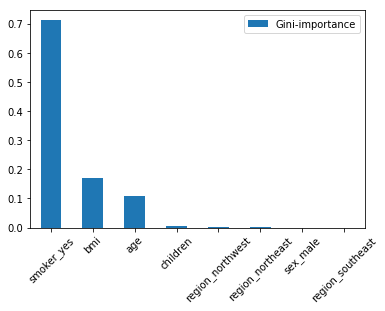

5174.06371948571

In [82]:
# We will use the optimized parameters obtained above: mean squered error == varince as spliting criteria, 
# max_depth=5 with others parameters set as default
tree = DecisionTreeRegressor(criterion="mse", max_depth=5) 

# Fit the model with 
rt_model = tree.fit(x_train,y_train)

# Make predictions on testing set
rt_pred = rt_model.predict(x_test)

# Show the importance of features
show_feature_importance(rt_model, x_train)

# Show the test RMSE
rmse(y_test,rt_pred)

In [83]:
# 'gender' and 'region' are of no importance as shown above, so I will drop these features.

# Using 'age', 'bmi', 'children' and 'smoking' as predictors as stated in model_6 of multiple linear regression
X = df_1[['age','bmi','children','smoker_yes']]
Y = df_1['charges']

# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

# Exploring the optimized parameters for the regression tree
tree = DecisionTreeRegressor()
params_tree = {"max_depth":np.arange(2,10), 
              }
show_optimized_parameters(tree, params_tree, x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


            Gini-importance
smoker_yes         0.732004
bmi                0.162130
age                0.105866
children           0.000000


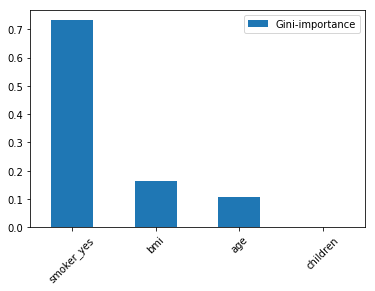

5198.212590616661

In [84]:
# Set the regression tree to the opitimized parameters obtained above
tree = DecisionTreeRegressor(criterion="mse",max_depth=3) 

#Fit the model
rt_model = tree.fit(x_train,y_train)

#Make predictions on testing set
rt_pred = rt_model.predict(x_test)

#Show the importance of features
show_feature_importance(rt_model, x_train)

# Calculate the root mean squared error
rmse(y_test,rt_pred)

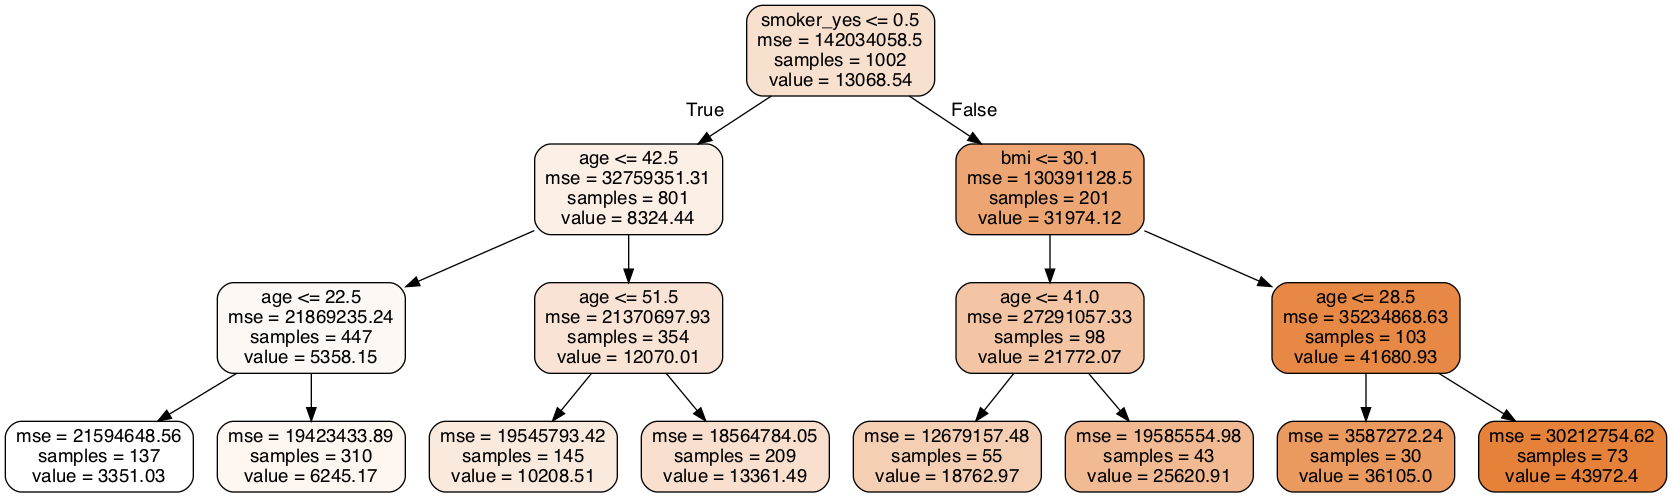

In [85]:
# Visualizing the regression tree

# Create DOT data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(rt_model, out_file=None, feature_names = x_train.columns,
                rounded = True, proportion = False, precision = 2, filled = True)

# Draw graph
import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)  


# Show graph
from IPython.display import Image
Image(graph.create_png())

### 6.5 Random Forests

In [86]:
# Still using 'age', 'bmi', 'children' and 'smoking' as predictors.
X = df_1[['age','bmi','children','smoker_yes']]
Y = df_1['charges']

# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

# Exploring the optimized parameters for the regression tree
rf=RandomForestRegressor()
params_tree = {"n_estimators":np.arange(10,100),
              "min_samples_leaf":np.arange(1,8)
              }
show_optimized_parameters(rf, params_tree, x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=7, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=54, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


            Gini-importance
smoker_yes         0.732004
bmi                0.162130
age                0.105866
children           0.000000


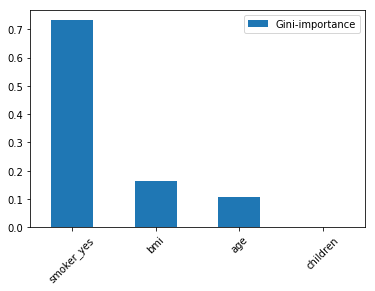

4894.150435558846

In [103]:
#Call training model, B=54, m=auto
rf = RandomForestRegressor(n_estimators=54, oob_score=True, min_samples_leaf=7)
rf_model=rf.fit(x_train, y_train)

#Make predictions on testing set
rf_pred = rf_model.predict(x_test)

#Show the importance of features
show_feature_importance(rf_model, x_train)

# Check rmse
rmse(y_test, rf_pred)

### 6.6 Boosting for regression trees
#### Adaboost regression tree 

In [88]:
##### Adaboost model

# Using 'age', 'bmi', 'children' and 'smoking' as predictors.
X = df_1[['age','bmi','children','smoker_yes']]
Y = df_1['charges']

# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

# Exploring the optimized parameters for the regression tree
adaboost = AdaBoostRegressor()
params_tree = {"n_estimators":np.arange(10,100),
               "learning_rate":(1, 0.01, 0.001)
              }
show_optimized_parameters(adaboost, params_tree, x_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.001, loss='linear',
         n_estimators=55, random_state=None)


            Gini-importance
smoker_yes         0.732004
bmi                0.162130
age                0.105866
children           0.000000


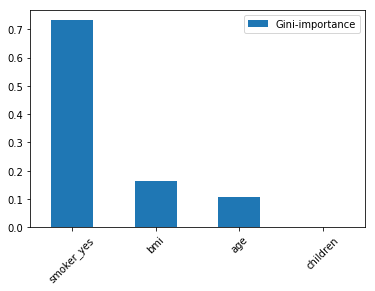

5087.88396578332

In [106]:
#Call training model, B=55, λ=0.001，d=1
adaboost = AdaBoostRegressor(n_estimators=55, learning_rate=0.001)
adaboost_model=adaboost.fit(x_train, y_train)

#Make predictions on testing set
adaboost_pred = adaboost_model.predict(x_test)

#Show the importance of features
show_feature_importance(adaboost_model, x_train)

# Check rmse
rmse(y_test, adaboost_pred)

#### Gradient Boosting Regression Tree

In [90]:
# Gradient Boosting Regression Tree

# Using 'age', 'bmi', 'children' and 'smoking' as predictors.
X = df_1[['age','bmi','children','smoker_yes']]
Y = df_1['charges']

# Splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = 0)

# Exploring the optimized parameters for the regression tree
gbrt = GradientBoostingRegressor()
params_tree = {"n_estimators":np.arange(10,500),
               "learning_rate":(0.01, 0.001)
              }
show_optimized_parameters(gbrt, params_tree, x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=389, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)


            Gini-importance
smoker_yes         0.732004
bmi                0.162130
age                0.105866
children           0.000000


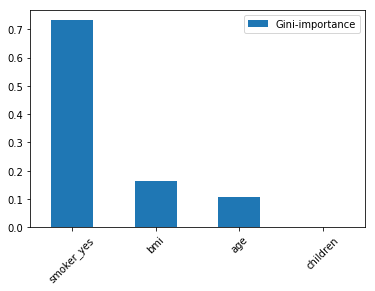

4906.556648513094

In [107]:
#Call training model, B=380, λ=0.01，d=1
gbrt = GradientBoostingRegressor(n_estimators=389, learning_rate=0.01)
gbrt_model=gbrt.fit(x_train, y_train)

#Make predictions on testing set
gbrt_pred = gbrt_model.predict(x_test)

#Show the importance of features
show_feature_importance(gbrt_model, x_train)

# Check rmse
rmse(y_test, gbrt_pred)

### 6.7 Comparison of the models

In [108]:
# Generating a dataframe of each model's residual mean squared error
performanceModel = pd.DataFrame({"model":["multiple linear regression", 
                                          "ridge regression", 
                                          "lasso",
                                          "regression tree",
                                          "randomforests",
                                          "adaboost regression tree",
                                          "gradient boosting regression tree"],
                                 "rmse":[rmse(y_test, multiple_linear_pred),
                                        rmse(y_test, ridge_pred),
                                        rmse(y_test, lasso_pred),
                                        rmse(y_test, rt_pred),
                                        rmse(y_test, rf_pred),
                                        rmse(y_test, adaboost_pred),
                                        rmse(y_test, gbrt_pred )]
                                })
print(performanceModel)

                               model         rmse
0         multiple linear regression  6392.679054
1                   ridge regression  6391.266016
2                              lasso  6392.622143
3                    regression tree  5198.212591
4                      randomforests  4894.150436
5           adaboost regression tree  5087.883966
6  gradient boosting regression tree  4906.556649


#### Random forests model and gradient boostting regression tree both show lowerer test mean squared error compared to others.

## 7. GUI for Medical Cost Prediction

In [109]:
# Medical Cost Prediction Tool
"""Widgets:
            Title - Label
            Age - Entry
            Height - Entry
            Weight - Entry
            Smoker - CheckButton
            Number of children - Entry
            Generate result - Button
            Result - Label
"""

from tkinter import *
from tkinter.ttk import *

TEMPLATE = "The medical cost is: {0:.2f} USD (predicted by '{1}' with the test RMSE of {2:.2f})."

class PredGui():
    """Define the Prediction Interface"""
    
    def __init__(self, window):
        """GUI constructor"""
        
        # Label widget showing the title/function of GUI
        self.name_label = Label(window, text='Medical Cost / Health Insurance Prediction', font=("Arial", 22))
        self.name_label.grid(row=0, column=0, columnspan=2, pady=10)
        
        # Entry and Checkbutton Widgets prompting the inputs
        self.age_label = Label(window, text='Age:')
        self.age_label.grid(row=1, column=0, pady=5)
        self.age = IntVar()
        self.age_entry = Entry(window, textvariable=self.age)
        self.age_entry.grid(row=1, column=1, pady=5)
        
        self.height_label = Label(window, text='Height(m):')
        self.height_label.grid(row=2, column=0, pady=5)
        self.height = DoubleVar()
        self.height_entry = Entry(window, textvariable=self.height)
        self.height_entry.grid(row=2, column=1, pady=5)
        
        self.weight_label = Label(window, text='Weight(kg):')
        self.weight_label.grid(row=3, column=0, pady=5)
        self.weight = DoubleVar()
        self.weight_entry = Entry(window, textvariable=self.weight)
        self.weight_entry.grid(row=3, column=1, pady=5)
        
        self.children_label = Label(window, text='The number of children:')
        self.children_label.grid(row=4, column=0, pady=5)
        self.children = IntVar()
        self.children_entry = Entry(window, textvariable=self.children)
        self.children_entry.grid(row=4, column=1, pady=5)
        
        self.smoker = IntVar()
        self.smoker_button = Checkbutton(window, 
                                         text='A current or previous smoker?', 
                                         variable=self.smoker, 
                                         onvalue=1, 
                                         offvalue=0)
        self.smoker_button.grid(row=5, column=0, columnspan=2, pady=5)
        
        # Button widgets generating result
        self.pred_button = Button(window, text='Predict', command=self.predict)
        self.pred_button.grid(row=6, column=0, columnspan=2, pady=5,ipady=10, ipadx=10)
        
        # Label widgets showing result
        self.mlr_result_label = Label(window)
        self.mlr_result_label.grid(row=7, column=0, columnspan=2, pady=5, sticky='W')
        self.ridge_result_label = Label(window)
        self.ridge_result_label.grid(row=8, column=0, columnspan=2, pady=5, sticky='W')
        self.lasso_result_label = Label(window)
        self.lasso_result_label.grid(row=9, column=0, columnspan=2, pady=5, sticky='W')
        self.rt_result_label = Label(window)
        self.rt_result_label.grid(row=10, column=0, columnspan=2, pady=5, sticky='W')
        self.rf_result_label = Label(window)
        self.rf_result_label.grid(row=11, column=0, columnspan=2, pady=5, sticky='W')
        self.adaboost_result_label = Label(window)
        self.adaboost_result_label.grid(row=12, column=0, columnspan=2, pady=5, sticky='W')
        self.gbrt_result_label = Label(window)
        self.gbrt_result_label.grid(row=13, column=0, columnspan=2, pady=5, sticky='W')
        
        # Further adjusting the layout
        window.columnconfigure(0, weight=1)
        window.columnconfigure(1, weight=1)
        window.rowconfigure((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13), weight=1)
        
        
    def predict(self):
        """Method to predict based on input from the user"""
        age = self.age.get()
        height = self.height.get()
        weight = self.weight.get()
        bmi =  weight / height ** 2
        children = self.children.get()
        smoker = self.smoker.get()
        data_lm = [(1, age, bmi, children, smoker)]
        df_lm = pd.DataFrame(data_lm, columns = ['const','age', 'bmi', 'children', 'smoker'])
        x_test_lm = df_lm[['const','age','bmi','children','smoker']]
        data = [(age, bmi, children, smoker)]
        df = pd.DataFrame(data, columns = ['age', 'bmi', 'children', 'smoker'])
        x_test = df[['age','bmi','children','smoker']]
        mlr_prediction = MultiLinear_6.predict(x_test_lm)
        ridge_prediction = ridge_model.predict(x_test_lm)
        lasso_prediction = lasso_model.predict(x_test_lm)
        rt_prediction = rt_model.predict(x_test)
        rf_prediction = rf_model.predict(x_test)
        adaboost_prediction = adaboost_model.predict(x_test)
        gbrt_prediction = gbrt_model.predict(x_test)
        self.mlr_result_label['text'] = TEMPLATE.format(list(mlr_prediction)[0],
                                                        "Multiple Linear Regression",
                                                        rmse(y_test, multiple_linear_pred))
        self.ridge_result_label['text'] = TEMPLATE.format(list(ridge_prediction)[0], 
                                                          "Ridge Regression",
                                                          rmse(y_test, ridge_pred))
        self.lasso_result_label['text'] = TEMPLATE.format(list(lasso_prediction)[0],
                                                          "Lasso",
                                                         rmse(y_test, lasso_pred))
        self.rt_result_label['text'] = TEMPLATE.format(list(rt_prediction)[0], 
                                                       "Regression Tree",
                                                       rmse(y_test, rt_pred))
        self.rf_result_label['text'] = TEMPLATE.format(list(rf_prediction)[0],
                                                       "Random Forests",
                                                       rmse(y_test, rf_pred))
        self.adaboost_result_label['text'] = TEMPLATE.format(list(adaboost_prediction)[0],
                                                          "Adaboost Regression Tree",
                                                             rmse(y_test, adaboost_pred))
        self.gbrt_result_label['text'] = TEMPLATE.format(list(gbrt_prediction)[0],
                                                          "Gradient Boosting Regression Tree",
                                                         rmse(y_test, gbrt_pred))
        
        
def main():
    """Setup the GUI"""
    window = Tk()
    prediction = PredGui(window)
    window.mainloop()

In [110]:
# Run the GUI
main()